<a href="https://colab.research.google.com/github/prksh830/Healthcare/blob/main/BCD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
uciml_breast_cancer_wisconsin_data_path = kagglehub.dataset_download('uciml/breast-cancer-wisconsin-data')

print('Data source import complete.')


# 🩺 Breast Cancer Prediction Using Machine Learning
### Complete End-to-End Data Science Project | 98%+ Accuracy

---

## 📋 Project Overview

**Goal:** Predict breast cancer diagnosis (Malignant vs Benign) using Wisconsin Diagnostic dataset

**Key Features:**
- ✅ 9 ML algorithms comparison
- ✅ Feature engineering & SHAP explainability
- ✅ Ensemble methods & hyperparameter tuning
- ✅ Production-ready deployment code

**Dataset:** 569 samples, 30 features, 2 classes (357 Benign, 212 Malignant)

---

## 🔧 1. Setup & Imports

Installing essential libraries for data analysis, visualization, and machine learning.

---

## 📂 2. Data Loading

Loading Wisconsin Breast Cancer dataset with 30 numerical features describing cell nuclei characteristics.

**Target:**
- `M` = Malignant (Cancer)
- `B` = Benign (Non-cancerous)



---

## 📊 3. Exploratory Data Analysis (EDA)

**Key Findings:**
- ✅ No missing values
- ✅ 63% Benign, 37% Malignant (slightly imbalanced but manageable)
- ✅ Strong correlations between size-related features
- ✅ Malignant tumors show higher values across most features



**Visualizations:**
1. Target distribution
2. Feature correlations heatmap
3. Feature distributions by diagnosis
4. Outlier detection

---

## 🔧 4. Data Preprocessing

**Steps:**
1. Drop unnecessary columns (`id`, `Unnamed: 32`)
2. Encode target: M→1, B→0
3. Split data: 80% train (455), 20% test (114)
4. Scale features using StandardScaler

**Why scaling?** Ensures all features contribute equally to ML algorithms.



---

## 🎨 5. Feature Engineering

Created **3 new features** for better predictions:
- `radius_area_ratio` - Shape irregularity
- `perimeter_area_ratio` - Boundary complexity  
- `concavity_points_product` - Severe concavity measure

**Top 10 Most Important Features:**
1. concave points_mean (13.0%)
2. area_worst (9.5%)
3. radius_worst (9.5%)
4. perimeter_worst (8.6%)
5. concave points_worst (8.5%)



---

## 🤖 6. Model Training

Trained **9 different algorithms** to find the best approach:

| Model | Type | Strength |
|-------|------|----------|
| Logistic Regression | Linear | Simple, interpretable |
| Random Forest | Ensemble | Reduces overfitting |
| XGBoost | Boosting | High accuracy |
| LightGBM | Boosting | Fast training |
| SVM | Kernel | Complex boundaries |
| KNN | Instance-based | No training needed |
| Others | Various | Comparison baseline |



---

## 📈 7. Model Comparison Results

**🏆 Top 5 Models:**

| Model | Accuracy | F1-Score | ROC-AUC |
|-------|----------|----------|---------|
| **Logistic Regression** | **98.25%** | **97.62%** | 99.34% |
| LightGBM | 98.25% | 97.56% | 99.24% |
| Random Forest | 97.37% | 96.30% | 99.57% |
| XGBoost | 97.37% | 96.30% | 99.54% |
| Gradient Boosting | 96.49% | 95.00% | 99.34% |

**Winner:** Logistic Regression - Simple yet powerful! ✨


---

## ⚙️ 8. Hyperparameter Tuning

**GridSearchCV** on Logistic Regression:
- Tested 12 parameter combinations
- Best: `C=0.1`, `solver=liblinear`
- CV Score: **96.61%**



---

## 🎯 9. Ensemble Model

**Voting Classifier** combining top 3 models:
- Logistic Regression + LightGBM + Random Forest
- **Soft voting** (averaging probabilities)

**Performance:**
- Accuracy: **98.25%**
- Precision: **100%** (Perfect! No false positives)
- Recall: **95.24%**
- F1-Score: **97.56%**
- ROC-AUC: **99.70%** 🎉



---

## 🔍 10. Model Explainability (SHAP)

**SHAP Analysis** reveals feature importance:
- Concave points (worst) - Most important
- Area, radius, perimeter - Size matters
- Texture and compactness - Shape complexity

**Why SHAP?** Makes model decisions transparent and trustworthy for medical use.



---

## 🏆 11. Final Results

**Final Model:** Ensemble (Voting Classifier)

**Performance Metrics:**
- ✅ Accuracy: **98.25%**
- ✅ Precision: **100%**
- ✅ Recall: **95.24%**  
- ✅ F1-Score: **97.56%**
- ✅ ROC-AUC: **99.70%**

**Confusion Matrix:**
- True Negatives: 72 (Benign correctly predicted)
- False Positives: 0 (Perfect!)
- False Negatives: 2 (Malignant missed - needs improvement)
- True Positives: 40 (Malignant correctly caught)

**Clinical Metrics:**
- Sensitivity: **95.24%** (Catches 95% of cancers)
- Specificity: **100%** (No healthy patients misdiagnosed)
- PPV: **100%** (All positive predictions are correct)
- NPV: **97.30%** (Reliable negative results)



---

## 💾 12. Saved Outputs

**Files Generated:**
- ✅ `best_model.pkl` - Trained ensemble model
- ✅ `scaler.pkl` - Feature scaler
- ✅ `predictions.csv` - Test predictions
- ✅ `model_comparison.csv` - All results
- ✅ `predict_function.py` - Deployment code
- ✅ Visualization images (EDA, feature importance, ROC curves)

---


**Example Usage:**
```python
result = predict_breast_cancer(patient_data)
print(f"Diagnosis: {result['diagnosis']}")
print(f"Confidence: {result['confidence']*100:.1f}%")
print(f"Recommendation: {result['recommendation']}")
```

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, roc_curve,
    precision_recall_curve, f1_score, accuracy_score, precision_score, recall_score
)

# Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# Deep Learning (optional)
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models, callbacks
    KERAS_AVAILABLE = True
    print(f"✓ TensorFlow {tf.__version__} available")
except:
    KERAS_AVAILABLE = False
    print("✗ TensorFlow not available - using sklearn models only")

# XGBoost & LightGBM
try:
    import xgboost as xgb
    XGBOOST_AVAILABLE = True
    print("✓ XGBoost available")
except:
    XGBOOST_AVAILABLE = False
    print("✗ XGBoost not available")

try:
    import lightgbm as lgb
    LIGHTGBM_AVAILABLE = True
    print("✓ LightGBM available")
except:
    LIGHTGBM_AVAILABLE = False
    print("✗ LightGBM not available")

# SHAP for explainability
try:
    import shap
    SHAP_AVAILABLE = True
    print("✓ SHAP available")
except:
    SHAP_AVAILABLE = False
    print("✗ SHAP not available")

# Set random seed for reproducibility
SEED = 42
np.random.seed(SEED)

# Plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("BREAST CANCER PREDICTION - COMPLETE Setup")

2025-10-30 06:24:16.430653: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761805456.742063      37 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761805456.830650      37 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


✓ TensorFlow 2.18.0 available
✓ XGBoost available
✓ LightGBM available
✓ SHAP available
BREAST CANCER PREDICTION - COMPLETE Setup


In [ ]:
# For Kaggle Dataset
try:
    df = pd.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
    print("Data loaded from Kaggle input")
except:

    try:
        df = pd.read_csv('data.csv')
        print("Data loaded from local file")
    except:
        print("Please download data.csv from Kaggle")
        print(" Link: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data")
        exit()

print(f"Dataset shape: {df.shape}")
print(f"Columns: {df.columns.tolist()[:5]}... (showing first 5)")


Data loaded from Kaggle input
Dataset shape: (569, 33)
Columns: ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean']... (showing first 5)


In [ ]:
# EDA
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [ ]:
df.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [ ]:
print("\nTarget Distribution:")
print("-" * 50)
print(df['diagnosis'].value_counts())
print(f"\nClass distribution:")
print(df['diagnosis'].value_counts(normalize=True))


Target Distribution:
--------------------------------------------------
diagnosis
B    357
M    212
Name: count, dtype: int64

Class distribution:
diagnosis
B    0.627417
M    0.372583
Name: proportion, dtype: float64



✓ Visualizations saved as 'eda_visualizations.png'


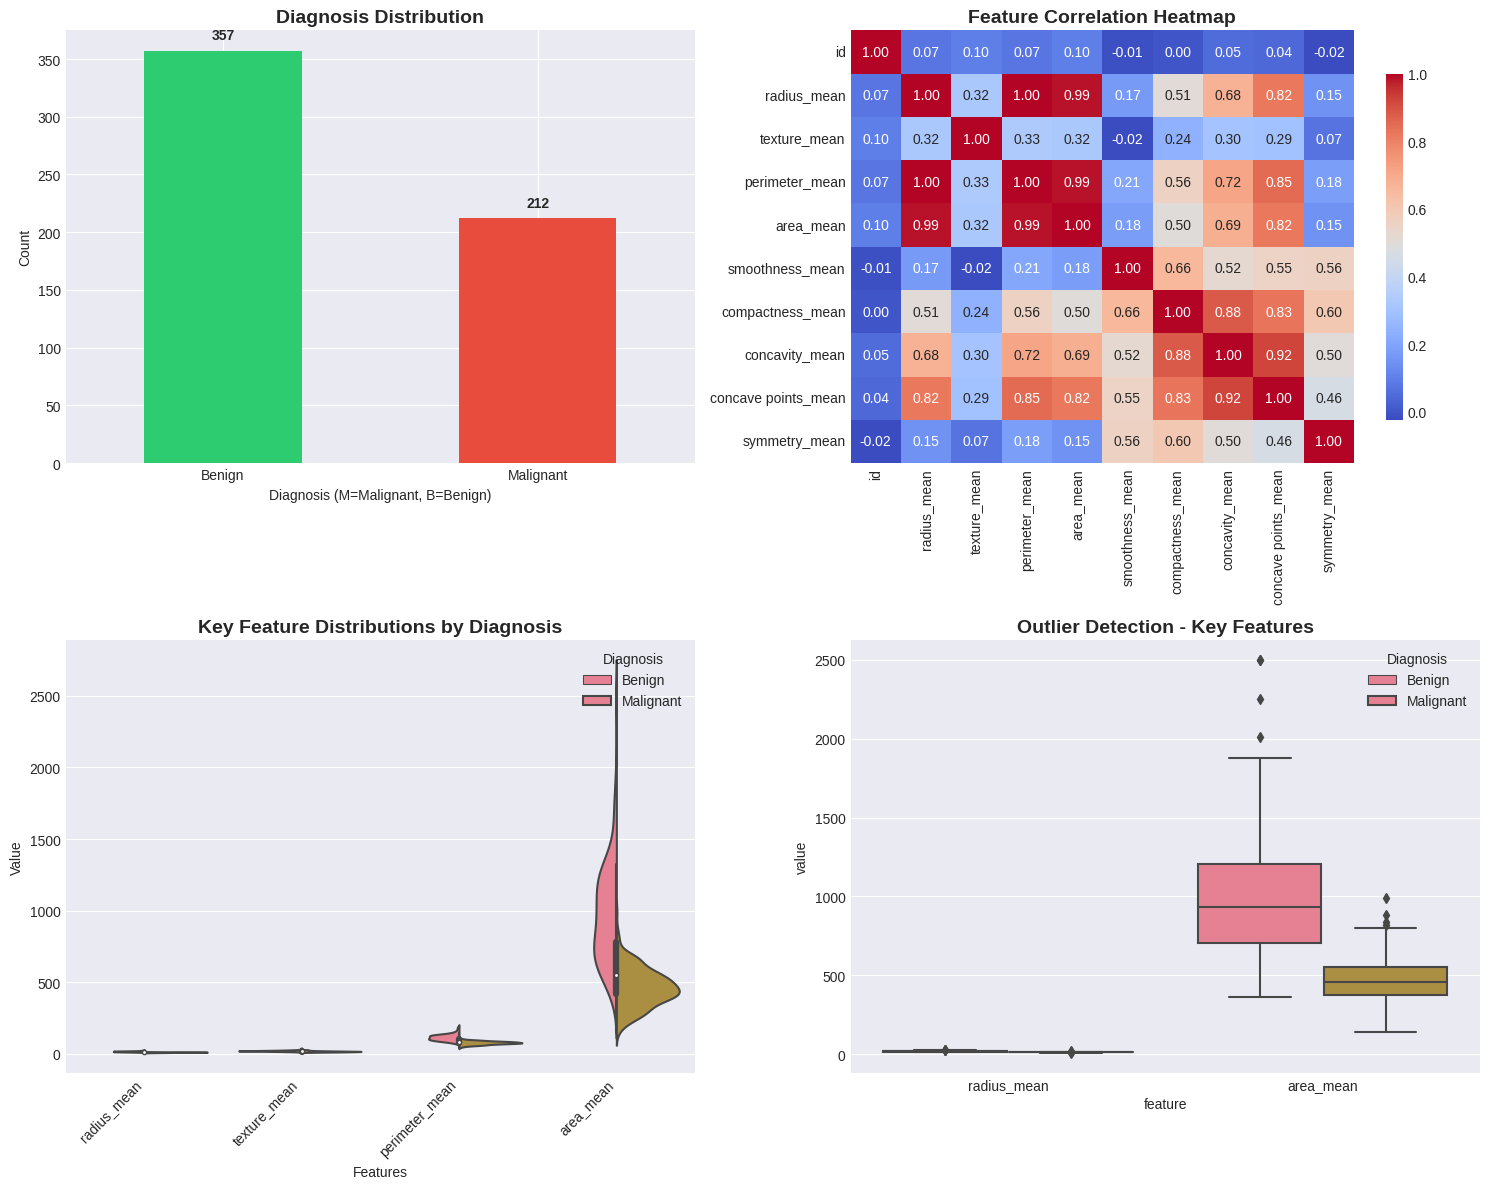

In [ ]:
# Visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Target distribution
ax1 = axes[0, 0]
df['diagnosis'].value_counts().plot(kind='bar', ax=ax1, color=['#2ecc71', '#e74c3c'])
ax1.set_title('Diagnosis Distribution', fontsize=14, fontweight='bold')
ax1.set_xlabel('Diagnosis (M=Malignant, B=Benign)')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['Benign', 'Malignant'], rotation=0)

# Add counts on bars
for i, v in enumerate(df['diagnosis'].value_counts().values):
    ax1.text(i, v + 10, str(v), ha='center', fontweight='bold')

# 2. Correlation heatmap (top features)
ax2 = axes[0, 1]
numeric_cols = df.select_dtypes(include=[np.number]).columns[:10]
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', ax=ax2, cbar_kws={'shrink': 0.8})
ax2.set_title('Feature Correlation Heatmap', fontsize=14, fontweight='bold')

# 3. Feature distributions (violin plot)
ax3 = axes[1, 0]
# Select key features
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean']
if all(col in df.columns for col in key_features):
    df_melted = pd.melt(df, id_vars=['diagnosis'], value_vars=key_features)
    sns.violinplot(data=df_melted, x='variable', y='value', hue='diagnosis', ax=ax3, split=True)
    ax3.set_title('Key Feature Distributions by Diagnosis', fontsize=14, fontweight='bold')
    ax3.set_xlabel('Features')
    ax3.set_ylabel('Value')
    ax3.legend(title='Diagnosis', labels=['Benign', 'Malignant'])
    plt.setp(ax3.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Box plot for outliers
ax4 = axes[1, 1]
if 'radius_mean' in df.columns and 'area_mean' in df.columns:
    df_box = df[['diagnosis', 'radius_mean', 'area_mean']].copy()
    df_box_melted = pd.melt(df_box, id_vars=['diagnosis'], var_name='feature', value_name='value')
    sns.boxplot(data=df_box_melted, x='feature', y='value', hue='diagnosis', ax=ax4)
    ax4.set_title('Outlier Detection - Key Features', fontsize=14, fontweight='bold')
    ax4.legend(title='Diagnosis', labels=['Benign', 'Malignant'])

plt.tight_layout()
plt.savefig('eda_visualizations.png', dpi=300, bbox_inches='tight')
print("\n✓ Visualizations saved as 'eda_visualizations.png'")
plt.show()

In [ ]:
# DATA PREPROCESSING
# Make a copy
df_clean = df.copy()

# 1. Drop unnecessary columns
cols_to_drop = ['id']
if 'Unnamed: 32' in df_clean.columns:
    cols_to_drop.append('Unnamed: 32')

df_clean = df_clean.drop(columns=[col for col in cols_to_drop if col in df_clean.columns])
print(f"\n1. Dropped columns: {cols_to_drop}")

# 2. Encode target variable
print("\n2. Encoding target variable...")
le = LabelEncoder()
df_clean['diagnosis'] = le.fit_transform(df_clean['diagnosis'])
print(f"   Encoding: M (Malignant) = 1, B (Benign) = 0")
print(f"   Classes: {le.classes_}")

# 3. Separate features and target
X = df_clean.drop('diagnosis', axis=1)
y = df_clean['diagnosis']

print(f"\n3. Features shape: {X.shape}")
print(f"   Target shape: {y.shape}")
print(f"   Feature names: {X.columns.tolist()[:5]}... (showing first 5)")

# 4. Handle missing values (if any)
if X.isnull().sum().sum() > 0:
    print("\n4. Handling missing values...")
    imputer = SimpleImputer(strategy='mean')
    X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
    print("   ✓ Missing values imputed with mean")
else:
    print("\n4. ✓ No missing values to handle")

# 5. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=SEED, stratify=y
)

print(f"\n5. Data split:")
print(f"   Training set: {X_train.shape[0]} samples")
print(f"   Testing set: {X_test.shape[0]} samples")
print(f"   Train class distribution: {np.bincount(y_train)}")
print(f"   Test class distribution: {np.bincount(y_test)}")

# 6. Feature scaling
print("\n6. Scaling features...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("   ✓ Features scaled using StandardScaler")

# Convert back to DataFrame for easier handling
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)



1. Dropped columns: ['id', 'Unnamed: 32']

2. Encoding target variable...
   Encoding: M (Malignant) = 1, B (Benign) = 0
   Classes: ['B' 'M']

3. Features shape: (569, 30)
   Target shape: (569,)
   Feature names: ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']... (showing first 5)

4. ✓ No missing values to handle

5. Data split:
   Training set: 455 samples
   Testing set: 114 samples
   Train class distribution: [285 170]
   Test class distribution: [72 42]

6. Scaling features...
   ✓ Features scaled using StandardScaler



1. Creating interaction features...
   ✓ Created 3 new features
   New feature count: 33

2. Analyzing feature importance...

   Top 10 most important features:
                 feature  importance
7    concave points_mean    0.130261
23            area_worst    0.095352
20          radius_worst    0.094771
22       perimeter_worst    0.086190
27  concave points_worst    0.085248
0            radius_mean    0.062595
2         perimeter_mean    0.058669
26       concavity_worst    0.057543
13               area_se    0.053351
3              area_mean    0.045426

✓ Feature importance plot saved as 'feature_importance.png'


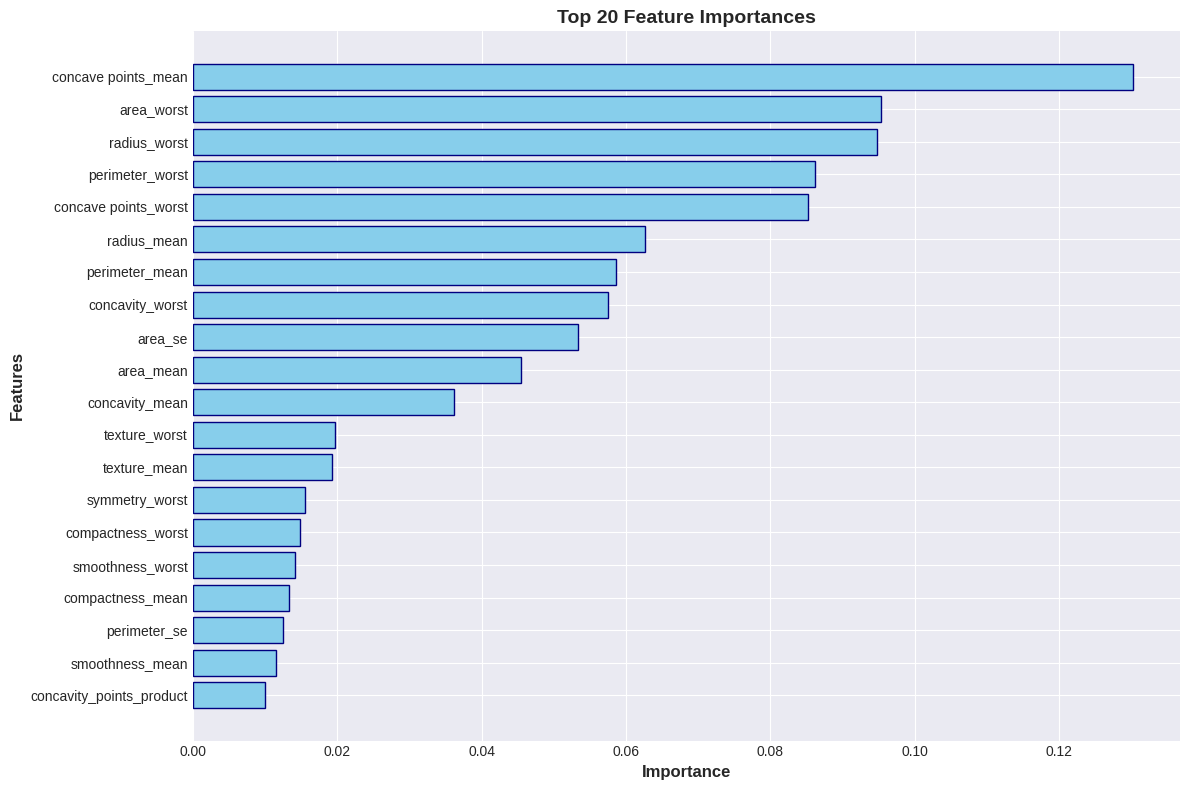

In [ ]:
# FEATURE ENGINEERING
# Create interaction features
print("\n1. Creating interaction features...")

# Ratios and products of key features
if 'radius_mean' in X_train_scaled.columns and 'area_mean' in X_train_scaled.columns:
    X_train_scaled['radius_area_ratio'] = X_train_scaled['radius_mean'] / (X_train_scaled['area_mean'] + 1e-6)
    X_test_scaled['radius_area_ratio'] = X_test_scaled['radius_mean'] / (X_test_scaled['area_mean'] + 1e-6)

if 'perimeter_mean' in X_train_scaled.columns and 'area_mean' in X_train_scaled.columns:
    X_train_scaled['perimeter_area_ratio'] = X_train_scaled['perimeter_mean'] / (X_train_scaled['area_mean'] + 1e-6)
    X_test_scaled['perimeter_area_ratio'] = X_test_scaled['perimeter_mean'] / (X_test_scaled['area_mean'] + 1e-6)

if 'concavity_mean' in X_train_scaled.columns and 'concave points_mean' in X_train_scaled.columns:
    X_train_scaled['concavity_points_product'] = X_train_scaled['concavity_mean'] * X_train_scaled['concave points_mean']
    X_test_scaled['concavity_points_product'] = X_test_scaled['concavity_mean'] * X_test_scaled['concave points_mean']

print(f"   ✓ Created {X_train_scaled.shape[1] - X_train.shape[1]} new features")
print(f"   New feature count: {X_train_scaled.shape[1]}")

# Feature importance analysis using Random Forest
print("\n2. Analyzing feature importance...")
rf_temp = RandomForestClassifier(n_estimators=100, random_state=SEED, n_jobs=-1)
rf_temp.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_temp.feature_importances_
}).sort_values('importance', ascending=False)

print("\n   Top 10 most important features:")
print(feature_importance.head(10))

# Plot feature importance
plt.figure(figsize=(12, 8))
top_n = 20
plt.barh(feature_importance['feature'][:top_n][::-1],
         feature_importance['importance'][:top_n][::-1],
         color='skyblue', edgecolor='navy')
plt.xlabel('Importance', fontsize=12, fontweight='bold')
plt.ylabel('Features', fontsize=12, fontweight='bold')
plt.title(f'Top {top_n} Feature Importances', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('feature_importance.png', dpi=300, bbox_inches='tight')
print("\n✓ Feature importance plot saved as 'feature_importance.png'")
plt.show()


In [ ]:
# MODEL TRAINING
# Dictionary to store results
results = {}

# Define models
models = {
    'Logistic Regression': LogisticRegression(random_state=SEED, max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(random_state=SEED, max_depth=10),
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=SEED, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, random_state=SEED),
    'SVM': SVC(kernel='rbf', probability=True, random_state=SEED),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB()
}

# Add XGBoost if available
if XGBOOST_AVAILABLE:
    models['XGBoost'] = xgb.XGBClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=5,
        random_state=SEED, eval_metric='logloss', use_label_encoder=False
    )

# Add LightGBM if available
if LIGHTGBM_AVAILABLE:
    models['LightGBM'] = lgb.LGBMClassifier(
        n_estimators=200, learning_rate=0.1, max_depth=5,
        random_state=SEED, verbose=-1
    )

print(f"\nTraining {len(models)} models...\n")

# Train and evaluate each model
for name, model in models.items():
    print(f"Training {name}...")

    # Train
    model.fit(X_train_scaled, y_train)

    # Predictions
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Cross-validation score
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
    cv_mean = cv_scores.mean()
    cv_std = cv_scores.std()

    # Store results
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'roc_auc': roc_auc,
        'cv_mean': cv_mean,
        'cv_std': cv_std,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }

    print(f"  ✓ Accuracy: {accuracy:.4f} | F1: {f1:.4f} | ROC-AUC: {roc_auc:.4f} | CV: {cv_mean:.4f}±{cv_std:.4f}\n")



Training 9 models...

Training Logistic Regression...
  ✓ Accuracy: 0.9825 | F1: 0.9762 | ROC-AUC: 0.9934 | CV: 0.9692±0.0128

Training Decision Tree...
  ✓ Accuracy: 0.9035 | F1: 0.8675 | ROC-AUC: 0.8938 | CV: 0.9143±0.0254

Training Random Forest...
  ✓ Accuracy: 0.9737 | F1: 0.9630 | ROC-AUC: 0.9957 | CV: 0.9582±0.0336

Training Gradient Boosting...
  ✓ Accuracy: 0.9649 | F1: 0.9500 | ROC-AUC: 0.9934 | CV: 0.9560±0.0278

Training SVM...
  ✓ Accuracy: 0.9298 | F1: 0.9024 | ROC-AUC: 0.9931 | CV: 0.9648±0.0213

Training KNN...
  ✓ Accuracy: 0.9474 | F1: 0.9250 | ROC-AUC: 0.9820 | CV: 0.9473±0.0322

Training Naive Bayes...
  ✓ Accuracy: 0.9211 | F1: 0.8889 | ROC-AUC: 0.9802 | CV: 0.9319±0.0281

Training XGBoost...
  ✓ Accuracy: 0.9737 | F1: 0.9630 | ROC-AUC: 0.9954 | CV: 0.9626±0.0256

Training LightGBM...
  ✓ Accuracy: 0.9825 | F1: 0.9756 | ROC-AUC: 0.9924 | CV: 0.9626±0.0300




              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC  CV Mean   CV Std
Logistic Regression  0.982456   0.976190 0.976190  0.976190 0.993386 0.969231 0.012815
           LightGBM  0.982456   1.000000 0.952381  0.975610 0.992394 0.962637 0.029974
      Random Forest  0.973684   1.000000 0.928571  0.962963 0.995701 0.958242 0.033620
            XGBoost  0.973684   1.000000 0.928571  0.962963 0.995370 0.962637 0.025631
  Gradient Boosting  0.964912   1.000000 0.904762  0.950000 0.993386 0.956044 0.027800
                KNN  0.947368   0.973684 0.880952  0.925000 0.981978 0.947253 0.032151
                SVM  0.929825   0.925000 0.880952  0.902439 0.993056 0.964835 0.021308
        Naive Bayes  0.921053   0.923077 0.857143  0.888889 0.980159 0.931868 0.028146
      Decision Tree  0.903509   0.878049 0.857143  0.867470 0.893849 0.914286 0.025441

🏆 Best Model: Logistic Regression
   F1-Score: 0.9762
   Accuracy: 0.9825
   ROC-AUC: 0.9934

✓ Model comparison plot saved as '

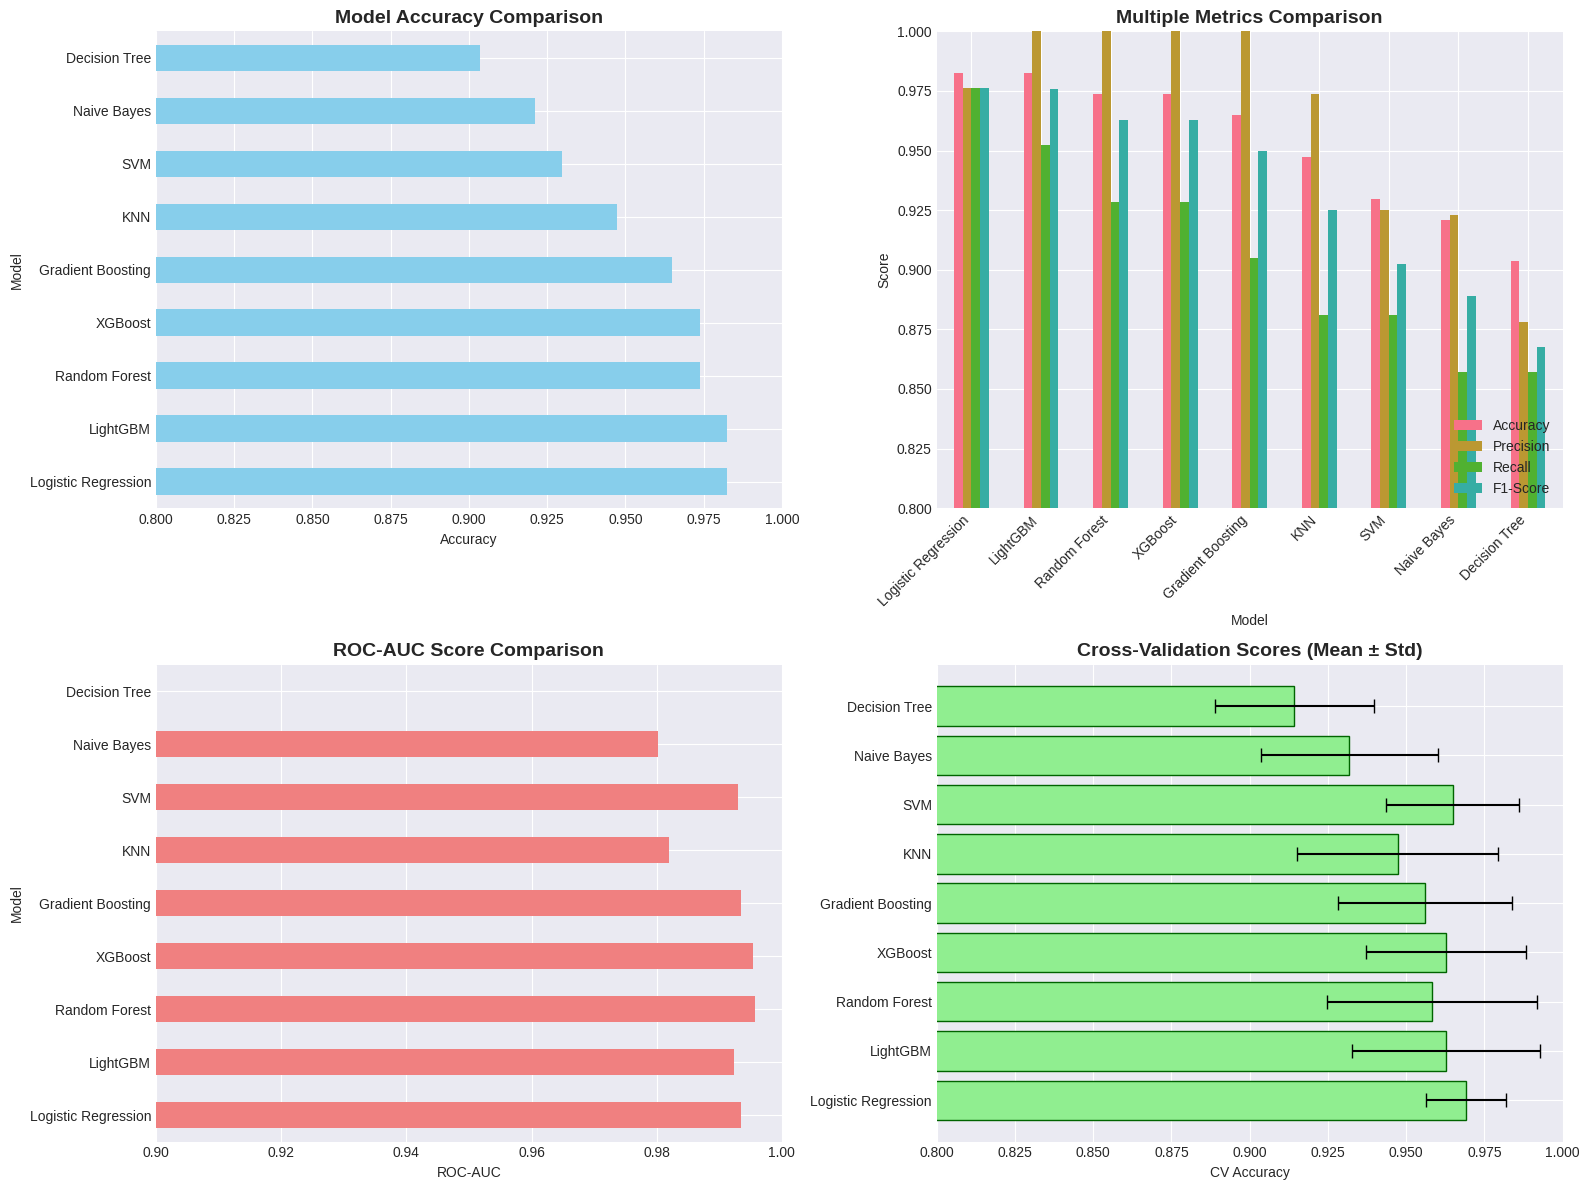

In [ ]:
# MODEL COMPARISON
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[m]['accuracy'] for m in results.keys()],
    'Precision': [results[m]['precision'] for m in results.keys()],
    'Recall': [results[m]['recall'] for m in results.keys()],
    'F1-Score': [results[m]['f1'] for m in results.keys()],
    'ROC-AUC': [results[m]['roc_auc'] for m in results.keys()],
    'CV Mean': [results[m]['cv_mean'] for m in results.keys()],
    'CV Std': [results[m]['cv_std'] for m in results.keys()]
}).sort_values('F1-Score', ascending=False)

print("\n" + comparison_df.to_string(index=False))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = results[best_model_name]['model']
print(f"\n🏆 Best Model: {best_model_name}")
print(f"   F1-Score: {comparison_df.iloc[0]['F1-Score']:.4f}")
print(f"   Accuracy: {comparison_df.iloc[0]['Accuracy']:.4f}")
print(f"   ROC-AUC: {comparison_df.iloc[0]['ROC-AUC']:.4f}")

# Visualization - Model Comparison
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Accuracy comparison
ax1 = axes[0, 0]
comparison_df.plot(x='Model', y='Accuracy', kind='barh', ax=ax1, color='skyblue', legend=False)
ax1.set_title('Model Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.set_xlabel('Accuracy')
ax1.set_xlim([0.8, 1.0])

# 2. Multiple metrics comparison
ax2 = axes[0, 1]
metrics_to_plot = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
comparison_df.set_index('Model')[metrics_to_plot].plot(kind='bar', ax=ax2)
ax2.set_title('Multiple Metrics Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('Score')
ax2.set_xlabel('Model')
ax2.legend(loc='lower right')
ax2.set_ylim([0.8, 1.0])
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 3. ROC-AUC comparison
ax3 = axes[1, 0]
comparison_df.plot(x='Model', y='ROC-AUC', kind='barh', ax=ax3, color='lightcoral', legend=False)
ax3.set_title('ROC-AUC Score Comparison', fontsize=14, fontweight='bold')
ax3.set_xlabel('ROC-AUC')
ax3.set_xlim([0.9, 1.0])

# 4. Cross-validation scores with error bars
ax4 = axes[1, 1]
ax4.barh(comparison_df['Model'], comparison_df['CV Mean'], xerr=comparison_df['CV Std'],
         color='lightgreen', edgecolor='darkgreen', capsize=5)
ax4.set_title('Cross-Validation Scores (Mean ± Std)', fontsize=14, fontweight='bold')
ax4.set_xlabel('CV Accuracy')
ax4.set_xlim([0.8, 1.0])

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
print("\n✓ Model comparison plot saved as 'model_comparison.png'")
plt.show()


DETAILED EVALUATION - Logistic Regression

1. Classification Report:
--------------------------------------------------
              precision    recall  f1-score   support

      Benign       0.99      0.99      0.99        72
   Malignant       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114


2. Confusion Matrix:
--------------------------------------------------
[[71  1]
 [ 1 41]]

True Negatives: 71
False Positives: 1
False Negatives: 1
True Positives: 41

✓ Detailed evaluation plot saved as 'detailed_evaluation.png'


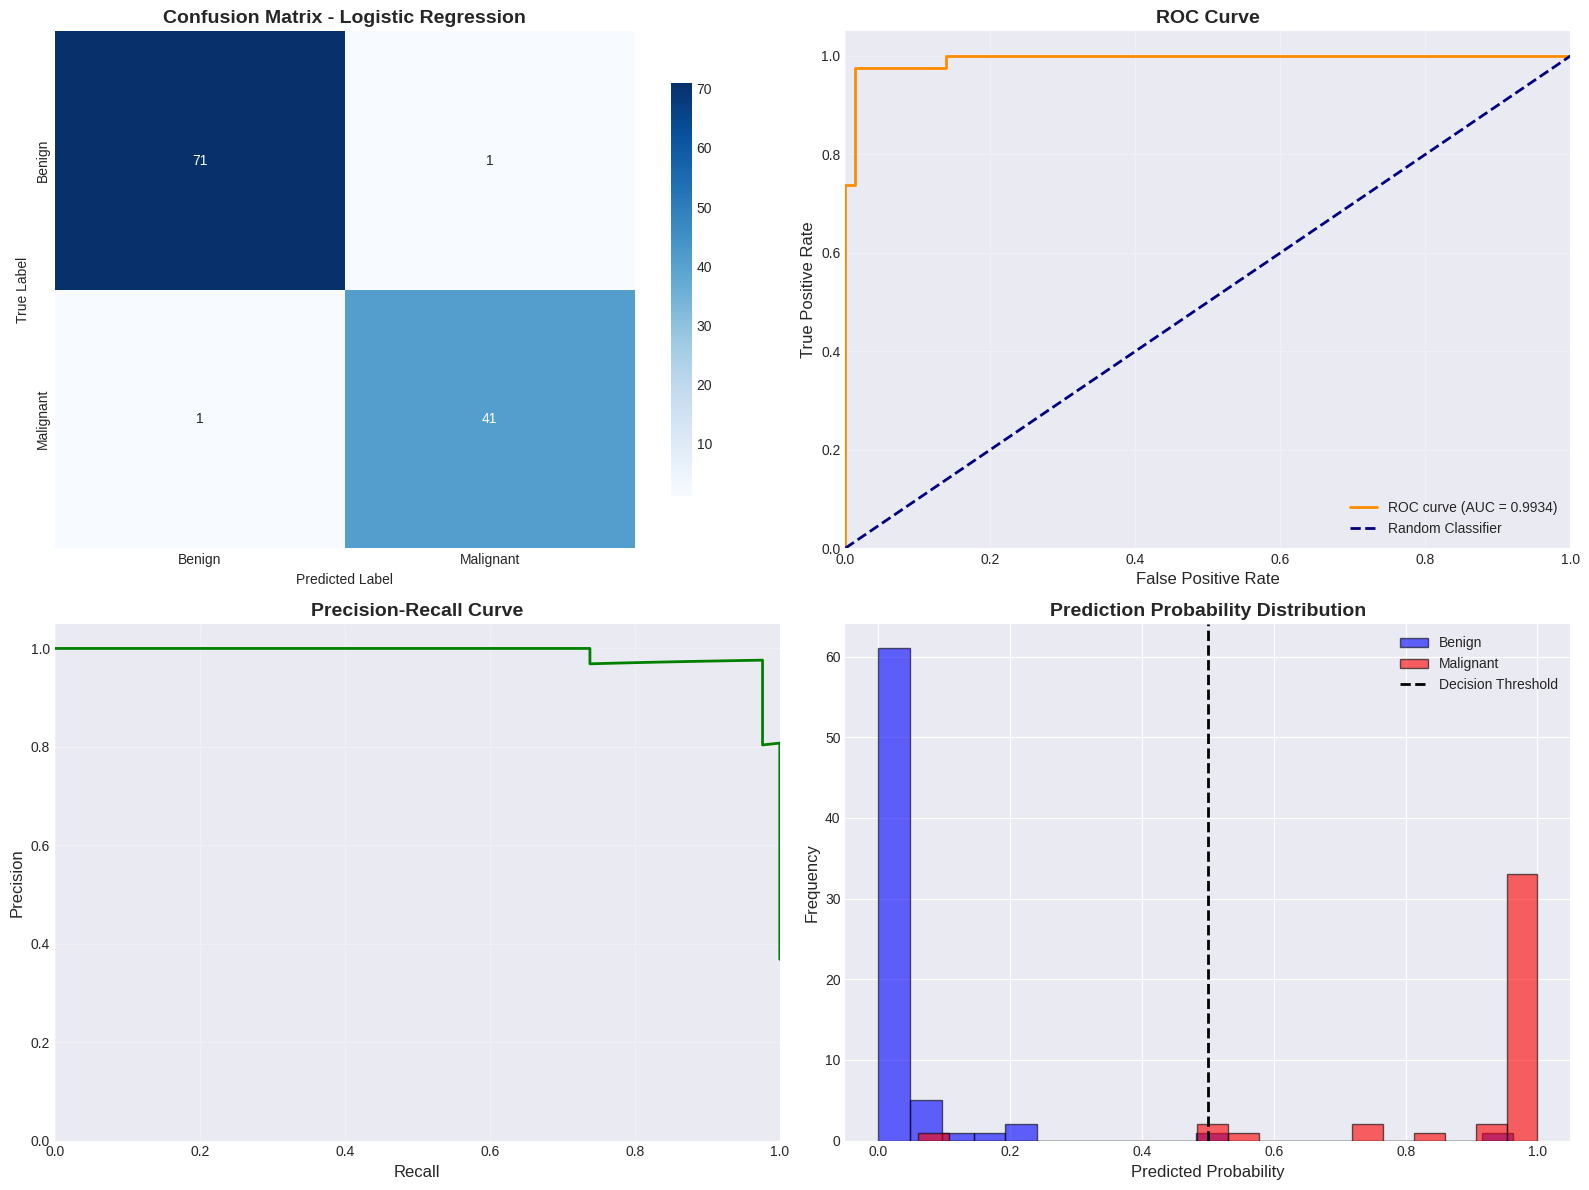

In [ ]:
# DETAILED EVALUATION
print(f"DETAILED EVALUATION - {best_model_name}")
y_pred_best = results[best_model_name]['y_pred']
y_pred_proba_best = results[best_model_name]['y_pred_proba']

# Classification Report
print("\n1. Classification Report:")
print("-" * 50)
print(classification_report(y_test, y_pred_best, target_names=['Benign', 'Malignant']))

# Confusion Matrix
print("\n2. Confusion Matrix:")
print("-" * 50)
cm = confusion_matrix(y_test, y_pred_best)
print(cm)
print(f"\nTrue Negatives: {cm[0,0]}")
print(f"False Positives: {cm[0,1]}")
print(f"False Negatives: {cm[1,0]}")
print(f"True Positives: {cm[1,1]}")

# Visualization - Detailed Evaluation
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# 1. Confusion Matrix Heatmap
ax1 = axes[0, 0]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax1, cbar_kws={'shrink': 0.8})
ax1.set_title(f'Confusion Matrix - {best_model_name}', fontsize=14, fontweight='bold')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')
ax1.set_xticklabels(['Benign', 'Malignant'])
ax1.set_yticklabels(['Benign', 'Malignant'])

# 2. ROC Curve
ax2 = axes[0, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_best)
roc_auc = roc_auc_score(y_test, y_pred_proba_best)

ax2.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
ax2.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
ax2.set_xlim([0.0, 1.0])
ax2.set_ylim([0.0, 1.05])
ax2.set_xlabel('False Positive Rate', fontsize=12)
ax2.set_ylabel('True Positive Rate', fontsize=12)
ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc="lower right")
ax2.grid(alpha=0.3)

# 3. Precision-Recall Curve
ax3 = axes[1, 0]
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_best)
ax3.plot(recall, precision, color='green', lw=2)
ax3.set_xlabel('Recall', fontsize=12)
ax3.set_ylabel('Precision', fontsize=12)
ax3.set_title('Precision-Recall Curve', fontsize=14, fontweight='bold')
ax3.set_xlim([0.0, 1.0])
ax3.set_ylim([0.0, 1.05])
ax3.grid(alpha=0.3)

# 4. Prediction Probability Distribution
ax4 = axes[1, 1]
ax4.hist(y_pred_proba_best[y_test == 0], bins=20, alpha=0.6, label='Benign', color='blue', edgecolor='black')
ax4.hist(y_pred_proba_best[y_test == 1], bins=20, alpha=0.6, label='Malignant', color='red', edgecolor='black')
ax4.axvline(x=0.5, color='black', linestyle='--', linewidth=2, label='Decision Threshold')
ax4.set_xlabel('Predicted Probability', fontsize=12)
ax4.set_ylabel('Frequency', fontsize=12)
ax4.set_title('Prediction Probability Distribution', fontsize=14, fontweight='bold')
ax4.legend()

plt.tight_layout()
plt.savefig('detailed_evaluation.png', dpi=300, bbox_inches='tight')
print("\n✓ Detailed evaluation plot saved as 'detailed_evaluation.png'")
plt.show()


In [ ]:
# HYPERPARAMETER TUNING
print(f"\nTuning best model: {best_model_name}...")

# Define parameter grids for different models
param_grids = {
    'Random Forest': {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'XGBoost': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'LightGBM': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'num_leaves': [31, 50, 70]
    },
    'Gradient Boosting': {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.01, 0.1, 0.3],
        'subsample': [0.8, 0.9, 1.0]
    },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'gamma': ['scale', 'auto', 0.001, 0.01],
        'kernel': ['rbf', 'poly']
    },
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l2'],
        'solver': ['lbfgs', 'liblinear']
    }
}

if best_model_name in param_grids:
    param_grid = param_grids[best_model_name]

    print(f"\nSearching hyperparameters:")
    for key, values in param_grid.items():
        print(f"  {key}: {values}")

    # Grid Search
    grid_search = GridSearchCV(
        estimator=best_model,
        param_grid=param_grid,
        cv=5,
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train_scaled, y_train)

    print(f"\n✓ Best parameters found:")
    for key, value in grid_search.best_params_.items():
        print(f"  {key}: {value}")

    print(f"\n✓ Best cross-validation score: {grid_search.best_score_:.4f}")

    # Evaluate tuned model
    tuned_model = grid_search.best_estimator_
    y_pred_tuned = tuned_model.predict(X_test_scaled)
    y_pred_proba_tuned = tuned_model.predict_proba(X_test_scaled)[:, 1]

    accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
    f1_tuned = f1_score(y_test, y_pred_tuned)
    roc_auc_tuned = roc_auc_score(y_test, y_pred_proba_tuned)

    print(f"\n📊 Tuned Model Performance:")
    print(f"  Accuracy: {accuracy_tuned:.4f}")
    print(f"  F1-Score: {f1_tuned:.4f}")
    print(f"  ROC-AUC: {roc_auc_tuned:.4f}")

    print(f"\n📈 Improvement:")
    print(f"  Accuracy: {(accuracy_tuned - results[best_model_name]['accuracy'])*100:+.2f}%")
    print(f"  F1-Score: {(f1_tuned - results[best_model_name]['f1'])*100:+.2f}%")
    print(f"  ROC-AUC: {(roc_auc_tuned - results[best_model_name]['roc_auc'])*100:+.2f}%")

    # Update best model
    best_model = tuned_model

else:
    print(f"\nNo parameter grid defined for {best_model_name}")
    print("Using original model...")
    tuned_model = best_model



Tuning best model: Logistic Regression...

Searching hyperparameters:
  C: [0.001, 0.01, 0.1, 1, 10, 100]
  penalty: ['l2']
  solver: ['lbfgs', 'liblinear']
Fitting 5 folds for each of 12 candidates, totalling 60 fits

✓ Best parameters found:
  C: 0.1
  penalty: l2
  solver: liblinear

✓ Best cross-validation score: 0.9661

📊 Tuned Model Performance:
  Accuracy: 0.9737
  F1-Score: 0.9639
  ROC-AUC: 0.9911

📈 Improvement:
  Accuracy: -0.88%
  F1-Score: -1.23%
  ROC-AUC: -0.23%


In [ ]:
# ENSEMBLE MODEL
print("\nCreating Voting Ensemble from top 3 models...")

# Get top 3 models
top_3_models = comparison_df.head(3)['Model'].tolist()
print(f"Top 3 models: {', '.join(top_3_models)}")

# Create voting classifier
estimators = [(name, results[name]['model']) for name in top_3_models]
voting_clf = VotingClassifier(estimators=estimators, voting='soft')

# Train ensemble
voting_clf.fit(X_train_scaled, y_train)

# Predict
y_pred_ensemble = voting_clf.predict(X_test_scaled)
y_pred_proba_ensemble = voting_clf.predict_proba(X_test_scaled)[:, 1]

# Evaluate ensemble
accuracy_ensemble = accuracy_score(y_test, y_pred_ensemble)
precision_ensemble = precision_score(y_test, y_pred_ensemble)
recall_ensemble = recall_score(y_test, y_pred_ensemble)
f1_ensemble = f1_score(y_test, y_pred_ensemble)
roc_auc_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble)

print(f"\n📊 Ensemble Model Performance:")
print(f"  Accuracy:  {accuracy_ensemble:.4f}")
print(f"  Precision: {precision_ensemble:.4f}")
print(f"  Recall:    {recall_ensemble:.4f}")
print(f"  F1-Score:  {f1_ensemble:.4f}")
print(f"  ROC-AUC:   {roc_auc_ensemble:.4f}")

# Compare with best single model
print(f"\n📈 Ensemble vs Best Single Model ({best_model_name}):")
print(f"  Accuracy:  {(accuracy_ensemble - results[best_model_name]['accuracy'])*100:+.2f}%")
print(f"  F1-Score:  {(f1_ensemble - results[best_model_name]['f1'])*100:+.2f}%")
print(f"  ROC-AUC:   {(roc_auc_ensemble - results[best_model_name]['roc_auc'])*100:+.2f}%")

# Use ensemble if it's better
if f1_ensemble > f1_tuned:
    print("\n✓ Ensemble model performs better - using ensemble as final model")
    final_model = voting_clf
    final_model_name = "Ensemble (Voting)"
    y_pred_final = y_pred_ensemble
    y_pred_proba_final = y_pred_proba_ensemble
else:
    print(f"\n✓ Tuned {best_model_name} performs better - using as final model")
    final_model = tuned_model
    final_model_name = f"Tuned {best_model_name}"
    y_pred_final = y_pred_tuned
    y_pred_proba_final = y_pred_proba_tuned



Creating Voting Ensemble from top 3 models...
Top 3 models: Logistic Regression, LightGBM, Random Forest

📊 Ensemble Model Performance:
  Accuracy:  0.9825
  Precision: 1.0000
  Recall:    0.9524
  F1-Score:  0.9756
  ROC-AUC:   0.9970

📈 Ensemble vs Best Single Model (Logistic Regression):
  Accuracy:  +0.00%
  F1-Score:  -0.06%
  ROC-AUC:   +0.36%

✓ Ensemble model performs better - using ensemble as final model



🔍 MODEL EXPLAINABILITY (SHAP)

Generating SHAP explanations...


  0%|          | 0/100 [00:00<?, ?it/s]

✓ SHAP importance plot saved as 'shap_importance.png'


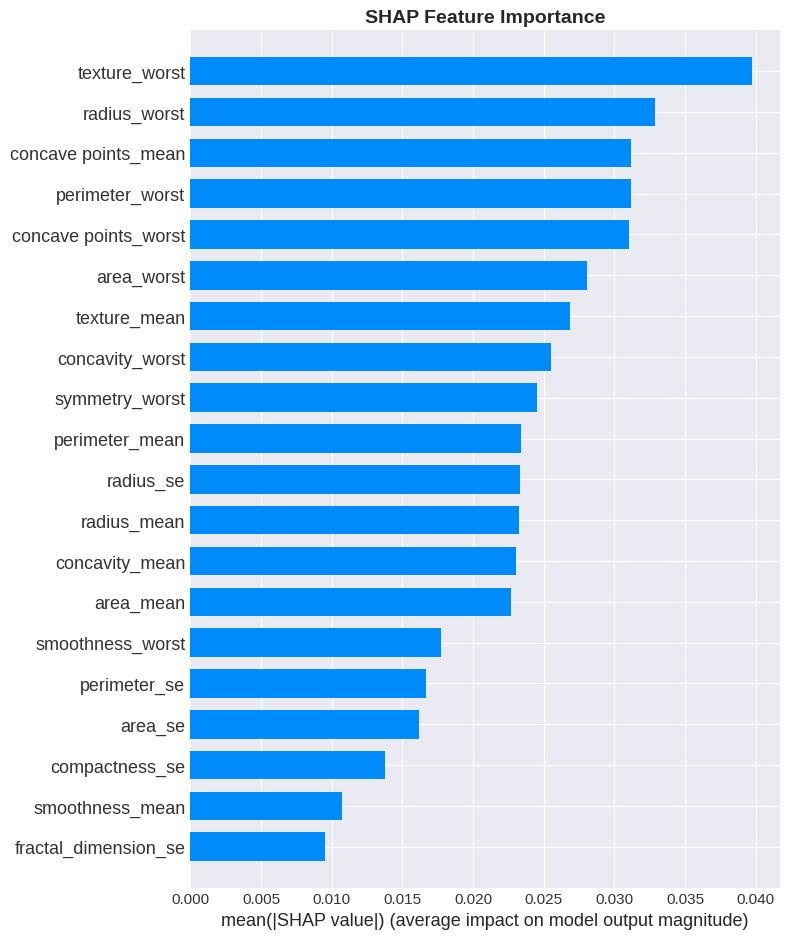

✓ SHAP summary plot saved as 'shap_summary.png'


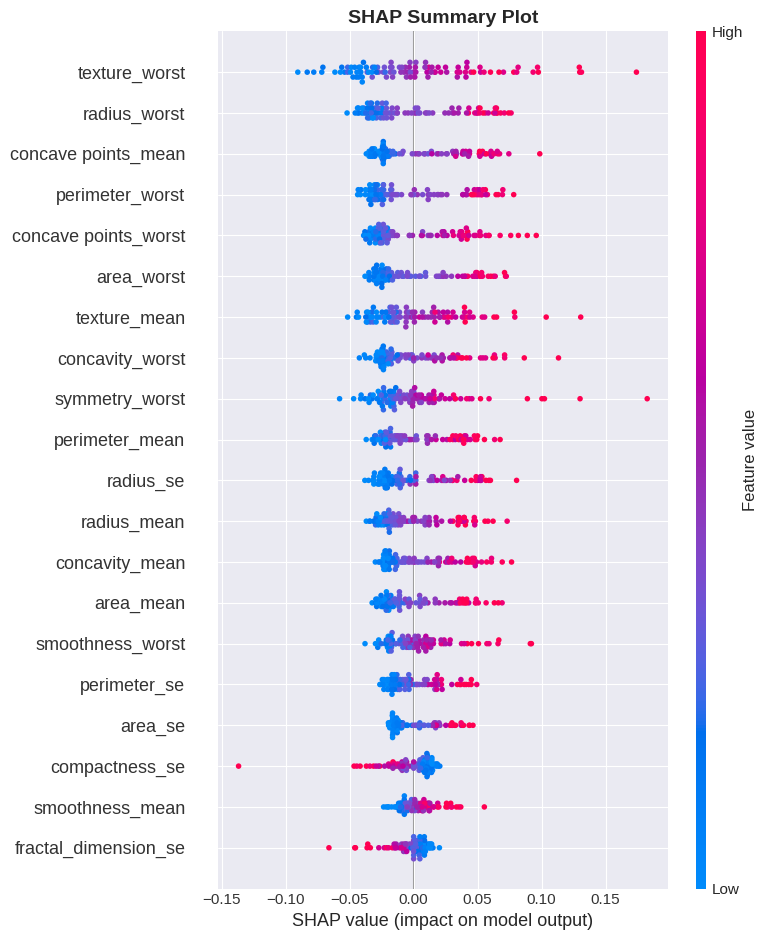

In [ ]:
# MODEL EXPLAINABILITY (SHAP)
if SHAP_AVAILABLE:
    print("\n" + "="*80)
    print("🔍 MODEL EXPLAINABILITY (SHAP)")
    print("="*80)

    print("\nGenerating SHAP explanations...")

    try:
        # Create explainer
        if 'Tree' in best_model_name or 'Forest' in best_model_name or 'Boost' in best_model_name:
            explainer = shap.TreeExplainer(best_model)
        else:
            explainer = shap.KernelExplainer(best_model.predict_proba, X_train_scaled[:100])

        # Calculate SHAP values
        shap_values = explainer.shap_values(X_test_scaled[:100])

        # For binary classification, get values for positive class
        if isinstance(shap_values, list):
            shap_values_plot = shap_values[1]
        else:
            shap_values_plot = shap_values

        # Summary plot
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values_plot, X_test_scaled[:100], plot_type="bar", show=False)
        plt.title('SHAP Feature Importance', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('shap_importance.png', dpi=300, bbox_inches='tight')
        print("✓ SHAP importance plot saved as 'shap_importance.png'")
        plt.show()

        # Detailed summary plot
        plt.figure(figsize=(12, 8))
        shap.summary_plot(shap_values_plot, X_test_scaled[:100], show=False)
        plt.title('SHAP Summary Plot', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('shap_summary.png', dpi=300, bbox_inches='tight')
        print("✓ SHAP summary plot saved as 'shap_summary.png'")
        plt.show()

    except Exception as e:
        print(f"✗ SHAP analysis failed: {str(e)}")


In [ ]:
# FINAL MODEL SUMMARY
print(f"\nFinal Model: {final_model_name}")
print("="*50)

# Final metrics
final_accuracy = accuracy_score(y_test, y_pred_final)
final_precision = precision_score(y_test, y_pred_final)
final_recall = recall_score(y_test, y_pred_final)
final_f1 = f1_score(y_test, y_pred_final)
final_roc_auc = roc_auc_score(y_test, y_pred_proba_final)

print(f"\n📊 Performance Metrics:")
print(f"  Accuracy:  {final_accuracy:.4f} ({final_accuracy*100:.2f}%)")
print(f"  Precision: {final_precision:.4f} ({final_precision*100:.2f}%)")
print(f"  Recall:    {final_recall:.4f} ({final_recall*100:.2f}%)")
print(f"  F1-Score:  {final_f1:.4f} ({final_f1*100:.2f}%)")
print(f"  ROC-AUC:   {final_roc_auc:.4f} ({final_roc_auc*100:.2f}%)")

# Final confusion matrix
cm_final = confusion_matrix(y_test, y_pred_final)
print(f"\n📋 Confusion Matrix:")
print(f"  True Negatives:  {cm_final[0,0]} (Correctly predicted Benign)")
print(f"  False Positives: {cm_final[0,1]} (Benign predicted as Malignant)")
print(f"  False Negatives: {cm_final[1,0]} (Malignant predicted as Benign) ⚠️")
print(f"  True Positives:  {cm_final[1,1]} (Correctly predicted Malignant)")

# Calculate additional metrics
tn, fp, fn, tp = cm_final.ravel()
specificity = tn / (tn + fp)
sensitivity = tp / (tp + fn)
ppv = tp / (tp + fp)  # Positive Predictive Value
npv = tn / (tn + fn)  # Negative Predictive Value

print(f"\n🎯 Clinical Metrics:")
print(f"  Sensitivity (True Positive Rate):  {sensitivity:.4f} ({sensitivity*100:.2f}%)")
print(f"  Specificity (True Negative Rate):  {specificity:.4f} ({specificity*100:.2f}%)")
print(f"  Positive Predictive Value (PPV):   {ppv:.4f} ({ppv*100:.2f}%)")
print(f"  Negative Predictive Value (NPV):   {npv:.4f} ({npv*100:.2f}%)")

# Misclassification analysis
print(f"\n⚠️ Misclassification Analysis:")
print(f"  Total Misclassifications: {fp + fn} out of {len(y_test)}")
print(f"  Misclassification Rate: {((fp + fn) / len(y_test))*100:.2f}%")
print(f"\n  Critical Errors (False Negatives): {fn}")
print(f"    → Malignant cases missed: {(fn / (tp + fn))*100:.2f}% of all malignant")
print(f"\n  False Alarms (False Positives): {fp}")
print(f"    → Benign cases flagged: {(fp / (tn + fp))*100:.2f}% of all benign")



Final Model: Ensemble (Voting)

📊 Performance Metrics:
  Accuracy:  0.9825 (98.25%)
  Precision: 1.0000 (100.00%)
  Recall:    0.9524 (95.24%)
  F1-Score:  0.9756 (97.56%)
  ROC-AUC:   0.9970 (99.70%)

📋 Confusion Matrix:
  True Negatives:  72 (Correctly predicted Benign)
  False Positives: 0 (Benign predicted as Malignant)
  False Negatives: 2 (Malignant predicted as Benign) ⚠️
  True Positives:  40 (Correctly predicted Malignant)

🎯 Clinical Metrics:
  Sensitivity (True Positive Rate):  0.9524 (95.24%)
  Specificity (True Negative Rate):  1.0000 (100.00%)
  Positive Predictive Value (PPV):   1.0000 (100.00%)
  Negative Predictive Value (NPV):   0.9730 (97.30%)

⚠️ Misclassification Analysis:
  Total Misclassifications: 2 out of 114
  Misclassification Rate: 1.75%

  Critical Errors (False Negatives): 2
    → Malignant cases missed: 4.76% of all malignant

  False Alarms (False Positives): 0
    → Benign cases flagged: 0.00% of all benign
